## Python statistics essential training - 03_05_morevariables

Standard imports

In [27]:
import numpy as np
import scipy.stats
import pandas as pd

In [28]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [29]:
import re
import mailbox
import csv

In [30]:
gapminder = pd.read_csv('gapminder.csv')

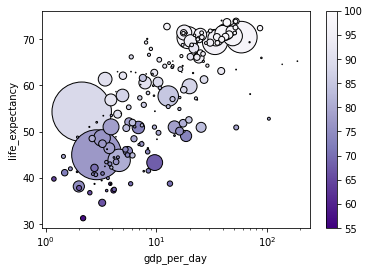

In [31]:
# create a function to generate scatter plots for different years
def plotyear(year):
    data= gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    data.plot.scatter('gdp_per_day','life_expectancy', logx=True, 
                      s = area,  linewidths = 1, edgecolors='k',c=color, colormap = matplotlib.cm.get_cmap('Purples_r')
                     ,vmin=55, vmax=100,sharex=False)
plotyear(1965)

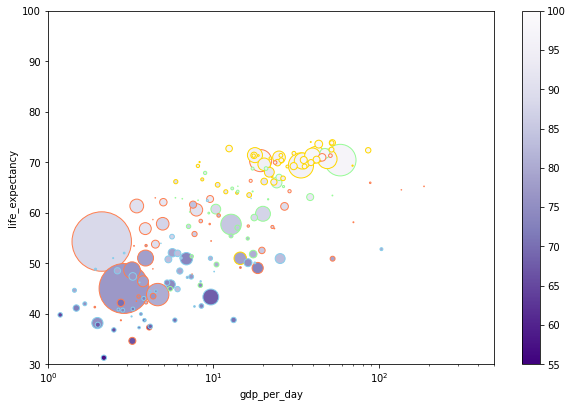

In [32]:
# create a function to generate scatter plots for different years
def plotyear(year):
    data= gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'skyblue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})
    data.plot.scatter('gdp_per_day','life_expectancy', logx=True, 
                      s = area,  linewidths = 1, edgecolors=edgecolor,c=color, colormap = matplotlib.cm.get_cmap('Purples_r')
                     ,vmin=55, vmax=100,sharex=False, figsize=(10,6.5))
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
plotyear(1965)

In [33]:
# animate
interact(plotyear, year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [34]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [35]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

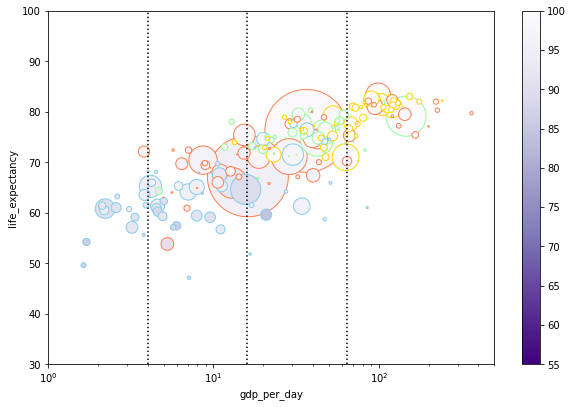

In [36]:
# create a function to generate scatter plots for different years
def plotyear(year):
    data= gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'skyblue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})
    data.plot.scatter('gdp_per_day','life_expectancy', logx=True, 
                      s = area,  linewidths = 1, edgecolors=edgecolor,c=color, colormap = matplotlib.cm.get_cmap('Purples_r')
                     ,vmin=55, vmax=100,sharex=False, figsize=(10,6.5))
    
    for level in [4,16,64]:
        pp.axvline(level, linestyle=':', color='k')
    
    
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
plotyear(2015)

/Users/elonazharri/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/Users/elonazharri/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 2015.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/elonazharri/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='population', ylabel='year'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='year'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='year'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='year'>,
        <AxesSubplot:xlabel='gdp_per_capita', ylabel='year'>,
        <AxesSubplot:xlabel='gdp_per_day', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='population', ylabel='population'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='population'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='population'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='population'>,
        <AxesSubplot:xlabel='gdp_per_capita', ylabel='population'>,
        <AxesSubplot:xlabel='gdp_per_day', ylabel='population'>],
       [<AxesSubplot:xlabel='year', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='population', ylabel='lif

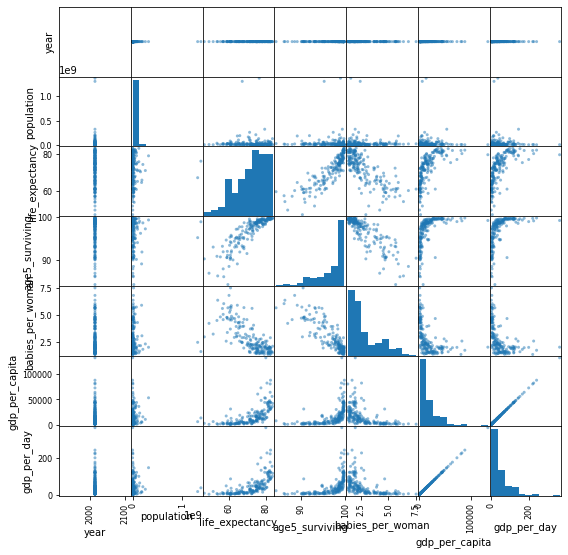

In [41]:
# plotting multiple variables at once we can use the pandas, ex scatter_matrix

data = gapminder.loc[gapminder.year == 2015]
gapminder['log10_gdp_per_day'] = np.log10(data['gdp_per_day'])

pandas.plotting.scatter_matrix(data,figsize=(9,9))